### To Run the Code
Execute all cells.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from packages.mixture.GaussianMixture import GaussianMixture
from sklearn.datasets import make_gaussian_quantiles

# Test against known data
"To assess the correctness of your implementation, one good way is to simulate data with the known ground truth and run your code on the simulated data to see if you can recover the true parameters. The simulation could be as simple as 1d or 2d data from 3 clusters with 100 samples."

#### Example
```
p=(0.3, 0.3, 0.4)

mu1=[0,0]

mu2 = [5,5]

mu3 = [10,10]


sigma = [[1, 0],  for all clusters
         [0, 1]]
```

"Sample 30, 30, and 40 samples from each of the Gaussian distributions to form a simulated dataset. The estimated parameters should look pretty close to the true parameters."

In [2]:
# samples from Gaussian distribution 1
X1, Y1 = make_gaussian_quantiles(mean=np.array([0,0]), 
                                 n_samples=30, 
                                 n_features=2, 
                                 n_classes=1)

X2, Y2 = make_gaussian_quantiles(mean=np.array([5,5]), 
                                 n_samples=30, 
                                 n_features=2, 
                                 n_classes=1)

X3, Y3 = make_gaussian_quantiles(mean=np.array([10,10]), 
                                 n_samples=40, 
                                 n_features=2, 
                                 n_classes=1)

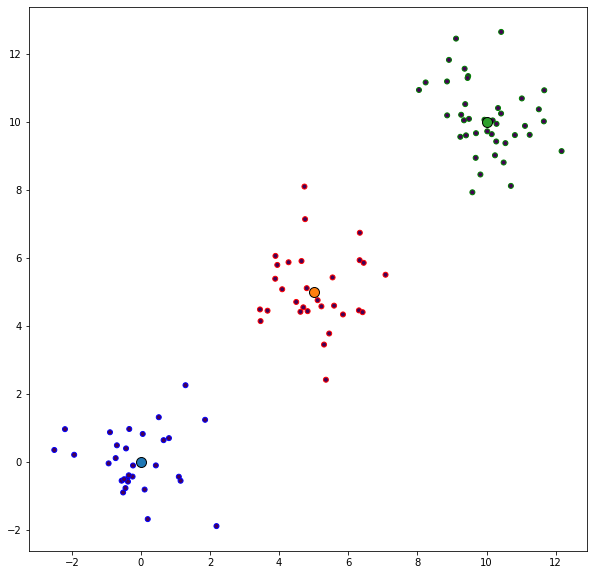

In [3]:
# before
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='b')

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='r')

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='g')


plt.scatter(0,0,s=100, edgecolor='k')

plt.scatter(5,5,s=100, edgecolor='k')

plt.scatter(10,10,s=100, edgecolor='k')
plt.show()

In [4]:
# generate single dataset
X_sample = np.concatenate([X1,X2,X3])
print(X_sample.shape)

# initial parameters
# pi
pi_init = [0.3,0.3,0.4]

# means
mu_init = [np.array([0,0]),
           np.array([5,5]),
           np.array([10,10])]

# covariance
sigma = np.zeros((2,2))
np.fill_diagonal(sigma, 1)
sigma_init = [sigma for i in range(3)]


gm = GaussianMixture(K=3, 
                     epsilon=1e-5, 
                     pi_init=pi_init,
                     mu_init=mu_init,
                     sigma_init=sigma_init)

scores_sample = gm.fit_and_score(X_sample)
print('Objective value at convergence:',scores_sample[-1])
print('Centroids:',gm.mu)

(100, 2)
Objective value at convergence: -389.01364928438846
Centroids: [array([-0.13290792,  0.02992617]), array([5.01601162, 5.0549336 ]), array([10.0116219 , 10.11041168])]


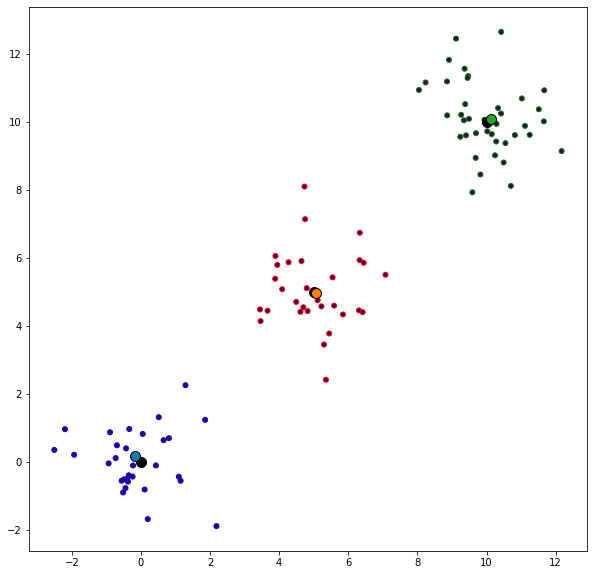

In [5]:
# after
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='b')

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='r')

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='g')

plt.scatter(0,0,s=100, c='k')

plt.scatter(5,5,s=100, c='k')

plt.scatter(10,10,s=100, c='k')


plt.scatter(-0.16115899,  0.15914197,s=100, edgecolor='k')

plt.scatter(5.06027788, 4.97375415,s=100, edgecolor='k')

plt.scatter(10.11887213, 10.06582495,s=100, edgecolor='k')
plt.show()

# Question 3

## 3.a.

### Data Prep

In [6]:
# load data
a = np.loadtxt('data/mouse-data/hip1000.txt', delimiter=',')
b = np.loadtxt('data/mouse-data/hip1000names.txt',delimiter=',',dtype=str)
c = np.loadtxt('data/test_mean.txt')

print(a.shape)
print(b.shape)
print(c.shape)


(208, 879)
(879,)
(208, 3)


In [8]:
# prep data
X = a.T[:,:10]  # first 10 dimensions
print(X.shape)

test_means = c.T[:,:10]  # first 10 dimensions
print(test_means.shape)

(879, 10)
(3, 10)


### Run Model

In [9]:
%%time

# initial parameters
# pi
pi_init = [0.3,0.3,0.4]
print(len(pi_init))

# means
mu_init = [test_means[i] for i in range(3)]
print(len(mu_init))
print(mu_init[0].shape)

# covariance
sigma = np.zeros((10,10))
np.fill_diagonal(sigma, 1)
sigma_init = [sigma for i in range(3)]
print(len(sigma_init))
print(sigma_init[0].shape)


gm = GaussianMixture(K=3, 
                     epsilon=1e-5, 
                     pi_init=pi_init, 
                     mu_init=mu_init,
                     sigma_init=sigma_init)

scores_3a = gm.fit_and_score(X)
print('Objective value at convergence:',scores_3a[-1])

3
3
(10,)
3
(10, 10)
Objective value at convergence: -10321.3763288697
CPU times: user 1.15 s, sys: 16.1 ms, total: 1.17 s
Wall time: 297 ms


### Plot Results

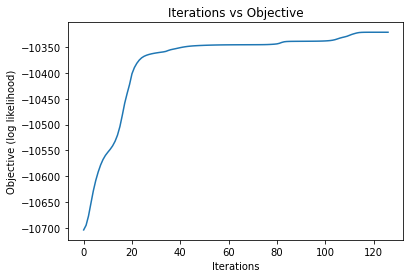

In [10]:
plt.title('Iterations vs Objective')
plt.xlabel('Iterations')
plt.ylabel('Objective (log likelihood)')
plt.plot(scores_3a[1:])  # initial objective value is discarded because E step has not yet been performed
plt.show()

## 3.b.

In [11]:
prob_3b = gm.predict_proba(X[0].reshape(1,-1))
np.round(prob_3b, 4)

array([[0.    , 0.1297, 0.8703]])

## 3.c.

### Run EM algorithm for different initializations

In [12]:
# parameters are randomized when they are not provided based on randomized soft-assignments

all_scores_3c = []

for i in range(10):
    
    gm = GaussianMixture(K=3, epsilon=1e-5)
    scores = gm.fit_and_score(X)
    all_scores_3c.append(scores)

for i in range(len(all_scores_3c)):
    msg = 'Log-likelihood at convergence for Initialization {}:{}'.format(i+1, all_scores_3c[i][-1])
    print(msg)
    
    

Log-likelihood at convergence for Initialization 1:-10330.416380378727
Log-likelihood at convergence for Initialization 2:-10539.497039037311
Log-likelihood at convergence for Initialization 3:-10304.480672117657
Log-likelihood at convergence for Initialization 4:-10524.184157574777
Log-likelihood at convergence for Initialization 5:-10526.404310570464
Log-likelihood at convergence for Initialization 6:-10304.480670848112
Log-likelihood at convergence for Initialization 7:-10518.153442790335
Log-likelihood at convergence for Initialization 8:-10522.57183048107
Log-likelihood at convergence for Initialization 9:-10539.21035882811
Log-likelihood at convergence for Initialization 10:-10327.533909192585


### plot

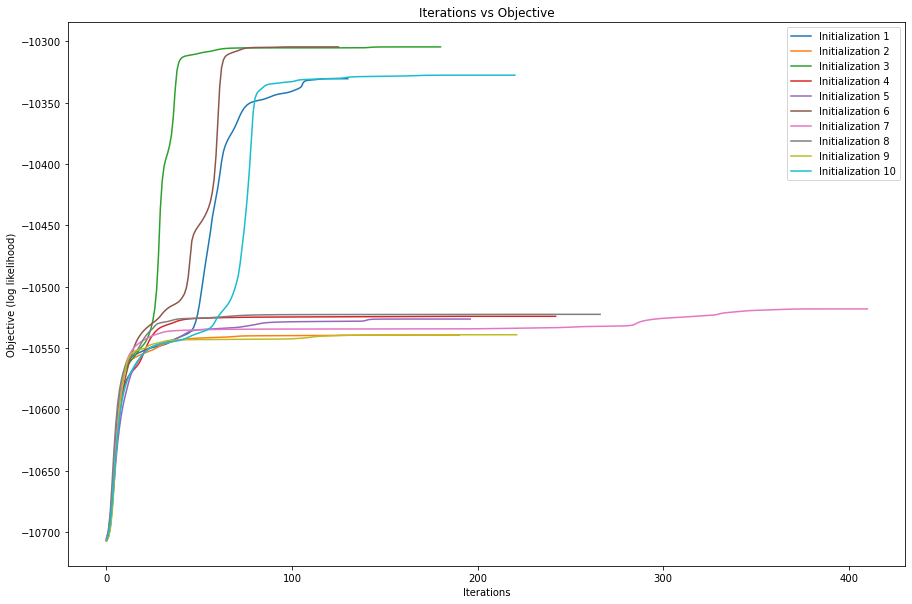

In [20]:
# plot results
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(all_scores_3c)):
    
    ax.plot(all_scores_3c[i], label='Initialization {}'.format(i+1))


plt.title('Iterations vs Objective')
plt.xlabel('Iterations')
plt.ylabel('Objective (log likelihood)')
plt.legend()
plt.show()

## 3.d.

### Run EM algorithm for different cluster sizes

In [15]:
all_scores_3d = []

for k in [3,4,5,6,7,8,9,10]:
    
    gm = GaussianMixture(K=k, epsilon=1e-5)
    scores = gm.fit_and_score(X)
    all_scores_3d.append(scores)

for i in range(len(all_scores_3d)):
    msg = 'Log-likelihood at convergence for Initialization {}:{}'.format(i+1, all_scores_3d[i][-1])
    print(msg)
    
    

Log-likelihood at convergence for Initialization 1:-10313.553525024767
Log-likelihood at convergence for Initialization 2:-10237.709138594671
Log-likelihood at convergence for Initialization 3:-10137.33672568774
Log-likelihood at convergence for Initialization 4:-10053.62223964478
Log-likelihood at convergence for Initialization 5:-9975.473401877123
Log-likelihood at convergence for Initialization 6:-9916.317150832005
Log-likelihood at convergence for Initialization 7:-9861.727514394046
Log-likelihood at convergence for Initialization 8:-9788.232352839274


### plot results

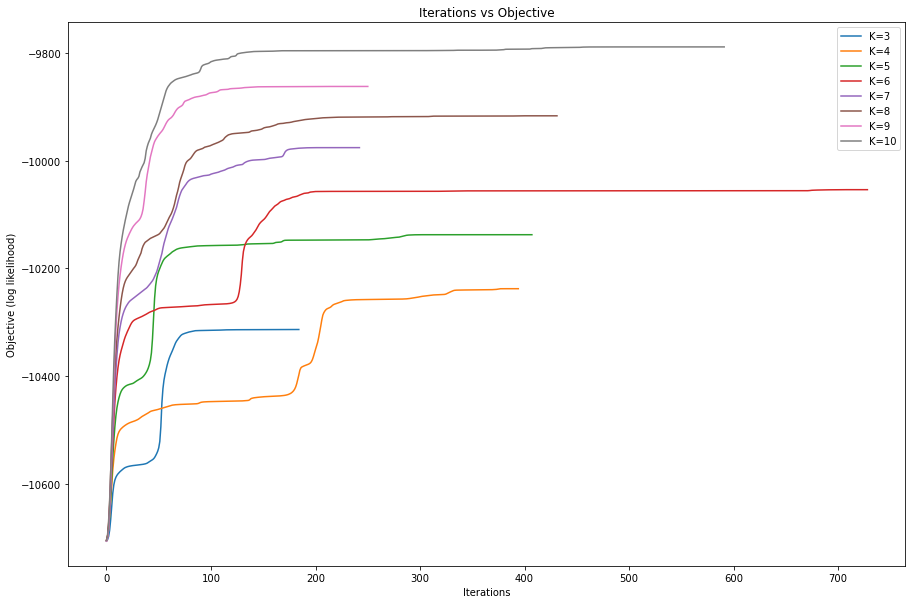

In [18]:
# plot results
fig, ax = plt.subplots(figsize=(15, 10))
for i, k in enumerate([3,4,5,6,7,8,9,10]):
    
    ax.plot(all_scores_3d[i], label='K={}'.format(k))


plt.title('Iterations vs Objective')
plt.xlabel('Iterations')
plt.ylabel('Objective (log likelihood)')
plt.legend()
plt.show()